In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from progplot import BarWriter

df = pd.read_csv("./examples/athlete_events.csv")

#read the region data
noc = pd.read_csv("./examples/noc_regions.csv")

#merge the two
olymp_df = df.merge(noc,left_on="NOC",right_on="NOC")

#select categories we want
olymp_df = olymp_df[["region","Age","Height","Weight","Year","Sport","Medal","NOC"]]

#fix the medal column

olymp_df = pd.concat([olymp_df,pd.get_dummies(olymp_df["Medal"])],axis=1)

olymp_df["Total"] = olymp_df["Bronze"] + olymp_df["Gold"] + olymp_df["Silver"]

olymp_df.drop("Medal",axis=1, inplace=True)
olymp_df["Year"] = pd.to_datetime(olymp_df["Year"],format="%Y")



from progplot import BarWriter

bw = BarWriter()

bw.set_data(data=olymp_df, category_col="region", timeseries_col="Year", value_col="Age", groupby_agg="count", resample_agg="mean", output_agg="cumsum", resample = "4y")

bw.set_display_settings(time_in_seconds=45, video_file_name = "mean_height_by_country.mp4")



Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


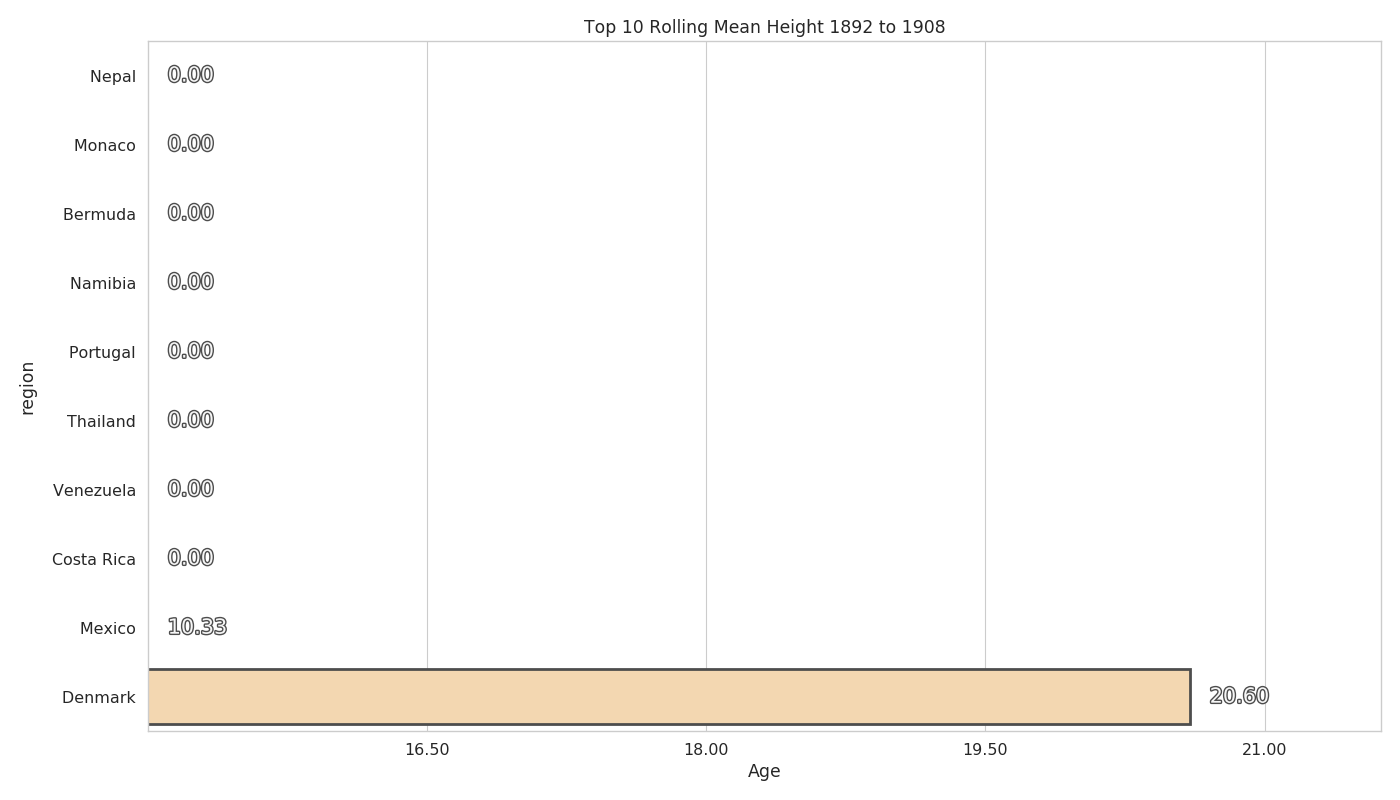

In [8]:
df = df.dropna()

bw.set_data(data=olymp_df, category_col="region", timeseries_col="Year", value_col="Age", groupby_agg="mean", resample_agg="mean", output_agg="4rolling", resample = "4y")

bw.set_display_settings(time_in_seconds=45, video_file_name = "mean_height_by_country.mp4")


bw.set_chart_options(x_tick_format="{:,.2f}",
                     palette="Pastel1",
                     title="Top 10 Rolling Mean Height <rollingdatetime> to <currentdatetime>",dateformat="%Y",
                     y_label="State",
                     use_top_x=10, display_top_x=10,
                     border_size=2, border_colour=(0.3,0.3,0.3),
                     font_scale=1.3,
                     use_data_labels="end",
                     squeeze_lower_x="15")
bw.test_chart(0)


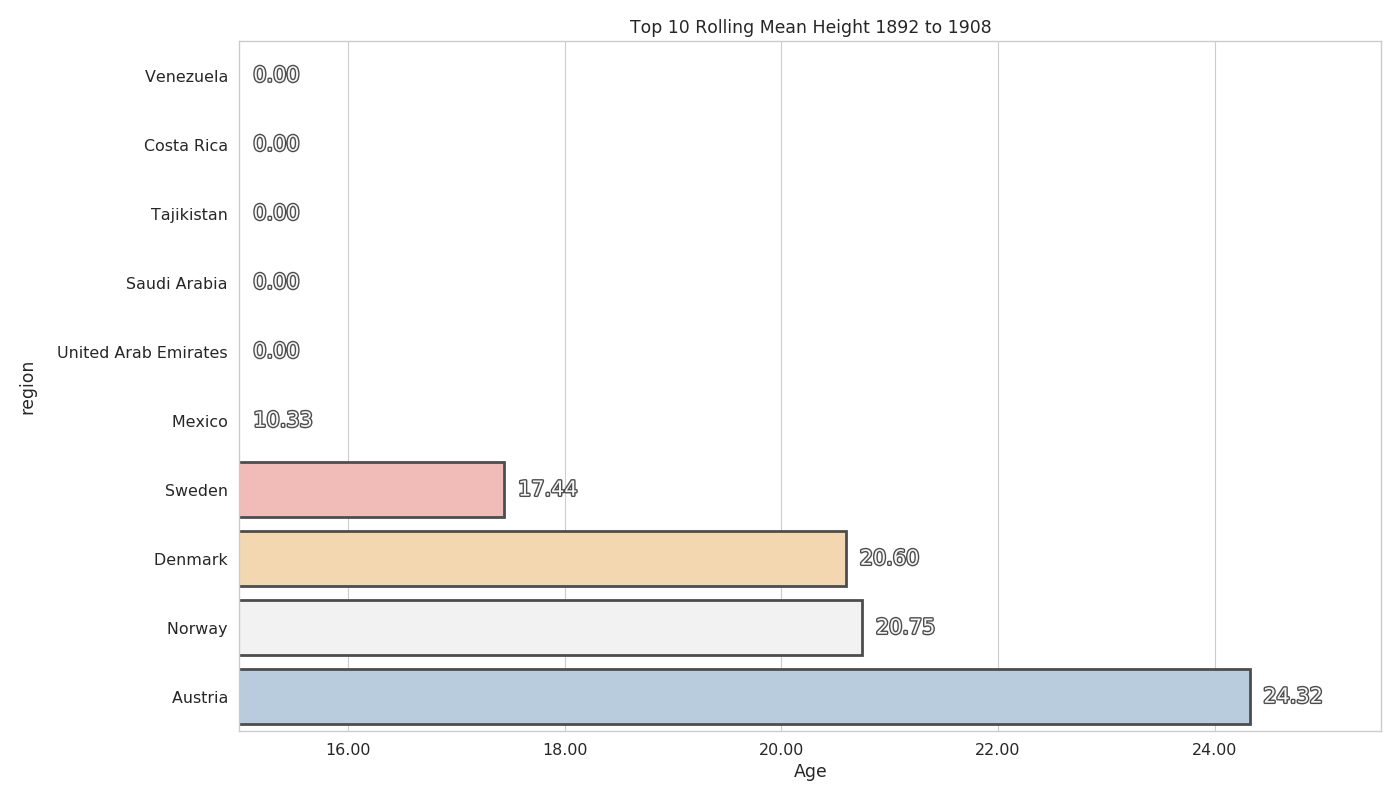

In [6]:
bw.set_chart_options(x_tick_format="{:,.2f}",
                     palette="Pastel1",
                     title="Top 10 Rolling Mean Height <rollingdatetime> to <currentdatetime>",dateformat="%Y",
                     y_label="State",
                     use_top_x=20, display_top_x=10,
                     border_size=2, border_colour=(0.3,0.3,0.3),
                     font_scale=1.3,
                     use_data_labels="end",
                     squeeze_lower_x="15")
bw.test_chart(0)

In [7]:
bw.write_video()

Writing Frame 1344/1344  Render Speed: 6.5fps  Time taken: 0:03:28  Time left: 23:59:59 [==============================] 100.07 % 
Base video created ... converting to desired output type


In [3]:
codes = pd.read_html("https://www.iban.com/country-codes",attrs = {'id': 'myTable'})
codes[0]

Country Alpha-2 code Alpha-3 code  Numeric
0          Afghanistan           AF          AFG        4
1        Åland Islands           AX          ALA      248
2              Albania           AL          ALB        8
3              Algeria           DZ          DZA       12
4       American Samoa           AS          ASM       16
..                 ...          ...          ...      ...
244  Wallis and Futuna           WF          WLF      876
245     Western Sahara           EH          ESH      732
246              Yemen           YE          YEM      887
247             Zambia           ZM          ZMB      894
248           Zimbabwe           ZW          ZWE      716

[249 rows x 4 columns]

In [4]:
olymp_df = olymp_df.merge(codes[0],left_on="NOC", right_on="Alpha-3 code")

In [5]:
olymp_df

region   Age  Height  Weight       Year       Sport  NOC  Bronze  \
0             China  24.0   180.0    80.0 1992-01-01  Basketball  CHN       0   
1             China  23.0   170.0    60.0 2012-01-01        Judo  CHN       0   
2             China  22.0   182.0    75.0 2000-01-01      Boxing  CHN       0   
3             China  25.0   160.0    62.0 2004-01-01   Wrestling  CHN       0   
4             China  14.0   168.0    54.0 2016-01-01    Swimming  CHN       0   
...             ...   ...     ...     ...        ...         ...  ...     ...   
196277          NaN  24.0   184.0    72.0 2016-01-01   Athletics  TUV       0   
196278          NaN  19.0     NaN     NaN 2008-01-01   Athletics  TUV       0   
196279  South Sudan  18.0   160.0    55.0 2016-01-01   Athletics  SSD       0   
196280  South Sudan  22.0   180.0    75.0 2016-01-01   Athletics  SSD       0   
196281  South Sudan  32.0   180.0    60.0 2016-01-01   Athletics  SSD       0   

        Gold  Silver  Total      Country Alpha-2 code Alpha-3 code  Numeric  
0          0       0      0        China           CN          CHN      156  
1          0       0      0        China           CN          CHN      156  
2          0       0      0        China           CN          CHN      156  
3          0       0      0        China           CN          CHN      156  
4          0       0      0        China           CN          CHN      156  
...      ...     ...    ...          ...          ...          ...      ...  
196277     0       0      0       Tuvalu           TV          TUV      798  
196278     0       0      0       Tuvalu           TV          TUV      798  
196279     0       0      0  South Sudan           SS          SSD      728  
196280     0       0      0  South Sudan           SS          SSD      728  
196281     0       0      0  South Sudan           SS          SSD      728  

[196282 rows x 15 columns]

In [6]:
countries = list(olymp_df.dropna().loc[:,"region"].unique())
codes = list(olymp_df.dropna().loc[:,"Alpha-2 code"].unique())

In [7]:
image_dict = {country:f"./icons/flags/{str(code).lower()}.png" for country,code in zip(countries,codes)}
image_dict

{'China': './icons/flags/cn.png',
 'USA': './icons/flags/us.png',
 'Finland': './icons/flags/fi.png',
 'Norway': './icons/flags/no.png',
 'Romania': './icons/flags/ro.png',
 'Estonia': './icons/flags/ee.png',
 'France': './icons/flags/fr.png',
 'Morocco': './icons/flags/ma.png',
 'Spain': './icons/flags/es.png',
 'Egypt': './icons/flags/eg.png',
 'Italy': './icons/flags/it.png',
 'Azerbaijan': './icons/flags/az.png',
 'Russia': './icons/flags/ru.png',
 'Argentina': './icons/flags/ar.png',
 'Cuba': './icons/flags/cu.png',
 'Belarus': './icons/flags/by.png',
 'Cameroon': './icons/flags/cm.png',
 'Turkey': './icons/flags/tr.png',
 'Mexico': './icons/flags/mx.png',
 'Hungary': './icons/flags/hu.png',
 'Bahrain': './icons/flags/bn.png',
 'Pakistan': './icons/flags/pk.png',
 'Iraq': './icons/flags/iq.png',
 'Qatar': './icons/flags/qa.png',
 'Canada': './icons/flags/ca.png',
 'Ireland': './icons/flags/ie.png',
 'Australia': './icons/flags/au.png',
 'Eritrea': './icons/flags/er.png',
 'Jordan'

In [8]:
help(bw.set_chart_options)

Help on method set_chart_options in module progplot.plotter:

set_chart_options(use_top_x=None, display_top_x=None, title=None, title_font_size=None, dateformat=None, use_data_labels='end', x_tick_format=None, y_tick_format=None, y_label=True, y_label_font_size=None, x_label=True, x_label_font_size=None, figsize=(14, 8), dpi=100, border_size=None, border_colour=(0, 0, 0), palette='magma', palette_keep=True, palette_random=True, tight_layout=True, sort=True, seaborn_style='whitegrid', seaborn_context='paper', font_scale=1.3, convert_bar_to_image=False, image_dict=None, squeeze_lower_x=None) method of progplot.plotter.BarWriter instance
    ----------------------------------------------
    
    Used to set chart output options
    
    Important values are:
    
        > use_top_x trims the dataframe down to the top x values.
        > display_top_x shows only x categories on the chart.
        > Chart title with substitued dates
        > All formatting variables
    
    Read these c

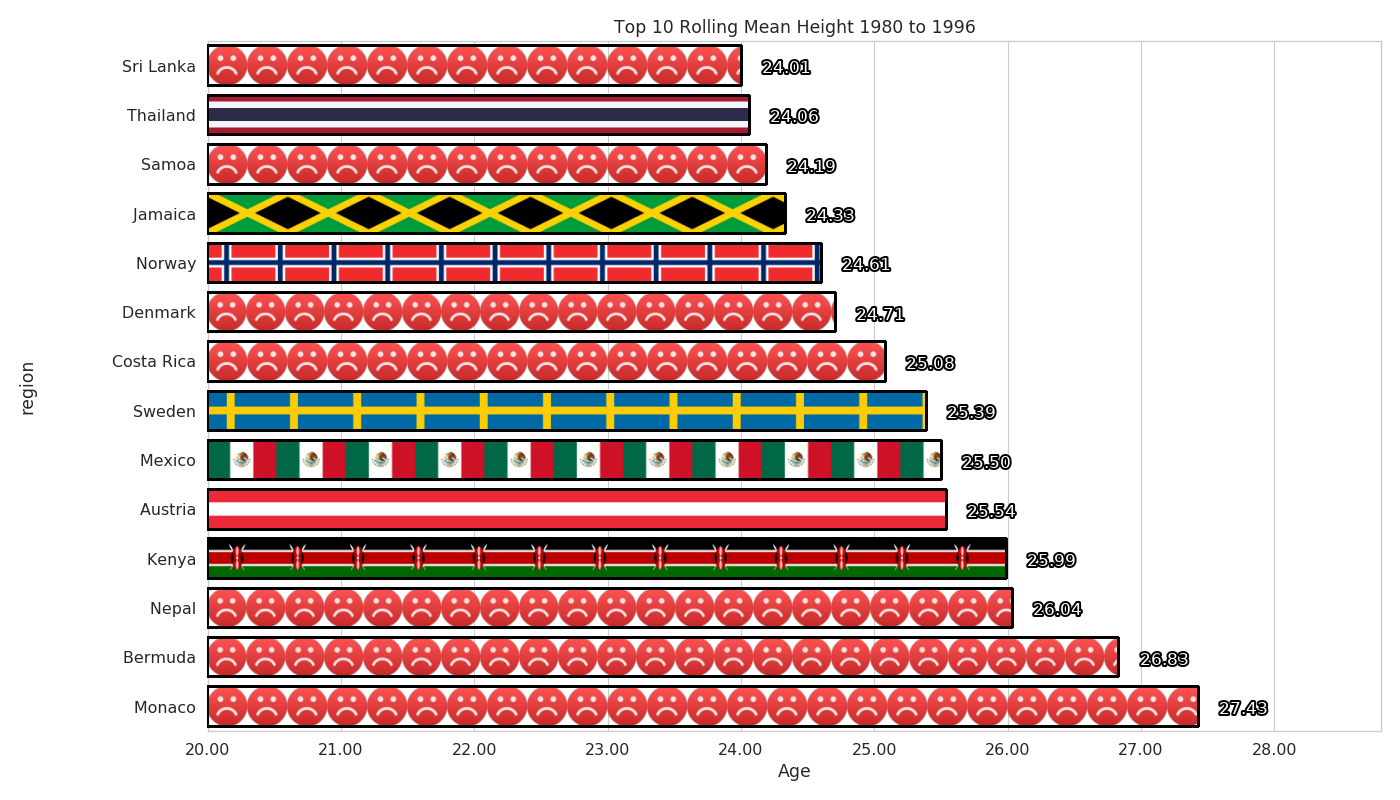

In [9]:
bw.set_chart_options(x_tick_format="{:,.2f}",
                     palette="Pastel1",
                     title="Top 10 Rolling Mean Height <rollingdatetime> to <currentdatetime>",dateformat="%Y",
                     y_label="State",
                     use_top_x=20, display_top_x=14,
                     border_size=2, border_colour=(0.3,0.3,0.3),
                     font_scale=1.3,
                     use_data_labels="end",
                     convert_bar_to_image=True,
                     image_dict=image_dict,
                     squeeze_lower_x="10%"                     
                    )
bw.test_chart()


Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


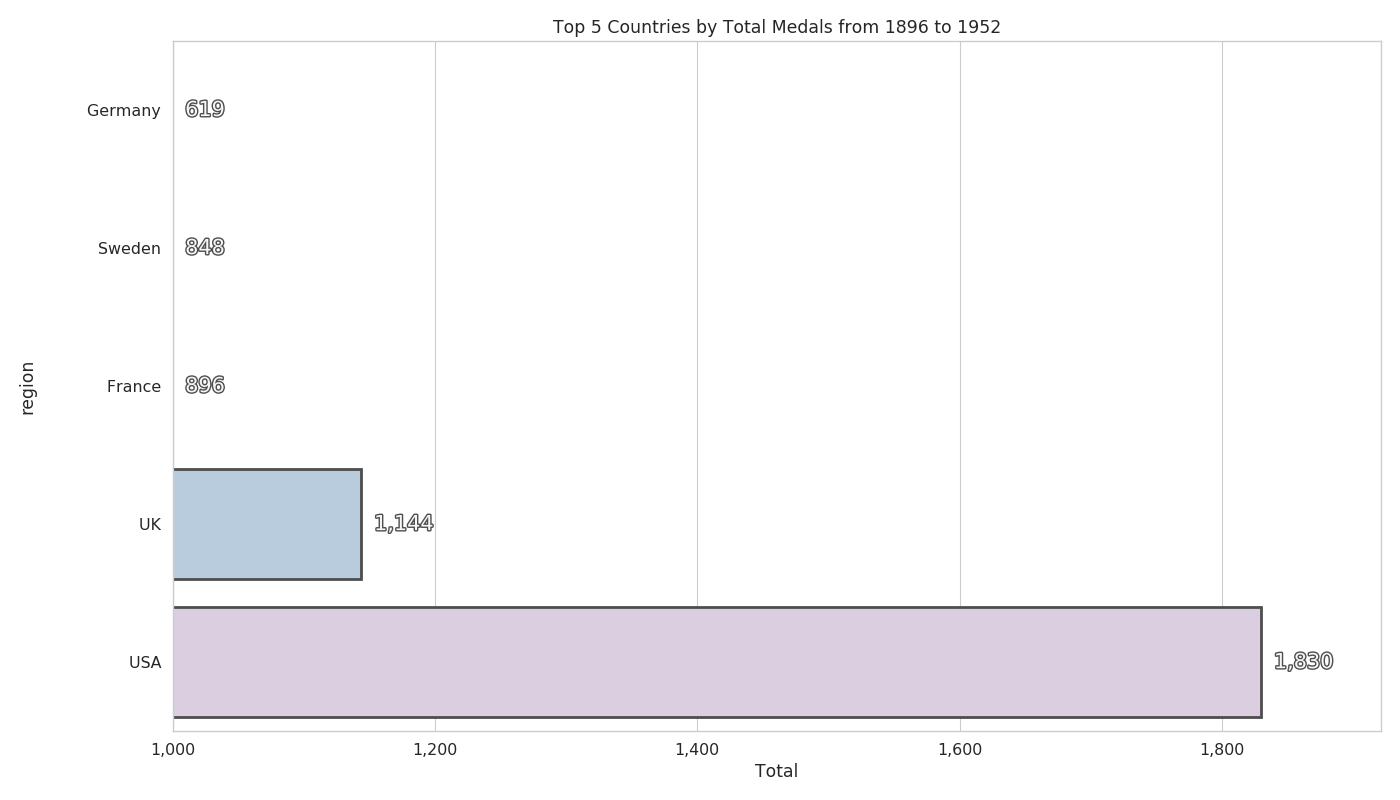

In [19]:
# %%

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from progplot import BarWriter

df = pd.read_csv("./examples/athlete_events.csv")

# read the region data
noc = pd.read_csv("./examples/noc_regions.csv")

# merge the two
olymp_df = df.merge(noc, left_on="NOC", right_on="NOC")

# select categories we want
olymp_df = olymp_df[["region", "Age", "Height", "Weight", "Year", "Sport", "Medal", "NOC"]]

# fix the medal column

olymp_df = pd.concat([olymp_df, pd.get_dummies(olymp_df["Medal"])], axis=1)

olymp_df["Total"] = olymp_df["Bronze"] + olymp_df["Gold"] + olymp_df["Silver"]

olymp_df.drop("Medal", axis=1, inplace=True)
olymp_df["Year"] = pd.to_datetime(olymp_df["Year"], format="%Y")

from progplot import BarWriter

bw = BarWriter()

bw.set_data(data=olymp_df, category_col="region", timeseries_col="Year", value_col="Total", groupby_agg="sum", resample_agg="sum", output_agg="cumsum", resample = "4y")

bw.set_display_settings(time_in_seconds=45, video_file_name="mean_height_by_country.mp4")

# %%

bw.set_chart_options(x_tick_format="{:,.0f}",
                     palette="Pastel1", 
                     title="Top 5 Countries by Total Medals from <mindatetime> to <currentdatetime>",dateformat="%Y", 
                     y_label="State", 
                     use_top_x=20, display_top_x=5,
                     border_size=2, border_colour=(0.3,0.3,0.3),
                     font_scale=1.3,
                     use_data_labels="end",
                     squeeze_lower_x="1000") # <----------- HERE either enter the percentace lower than the minimum data value you want the x value to be. OR the absolute value i.e 1000. *** NOTE: Will change to the nearest MAJOR TICK MARK
bw.test_chart(14)

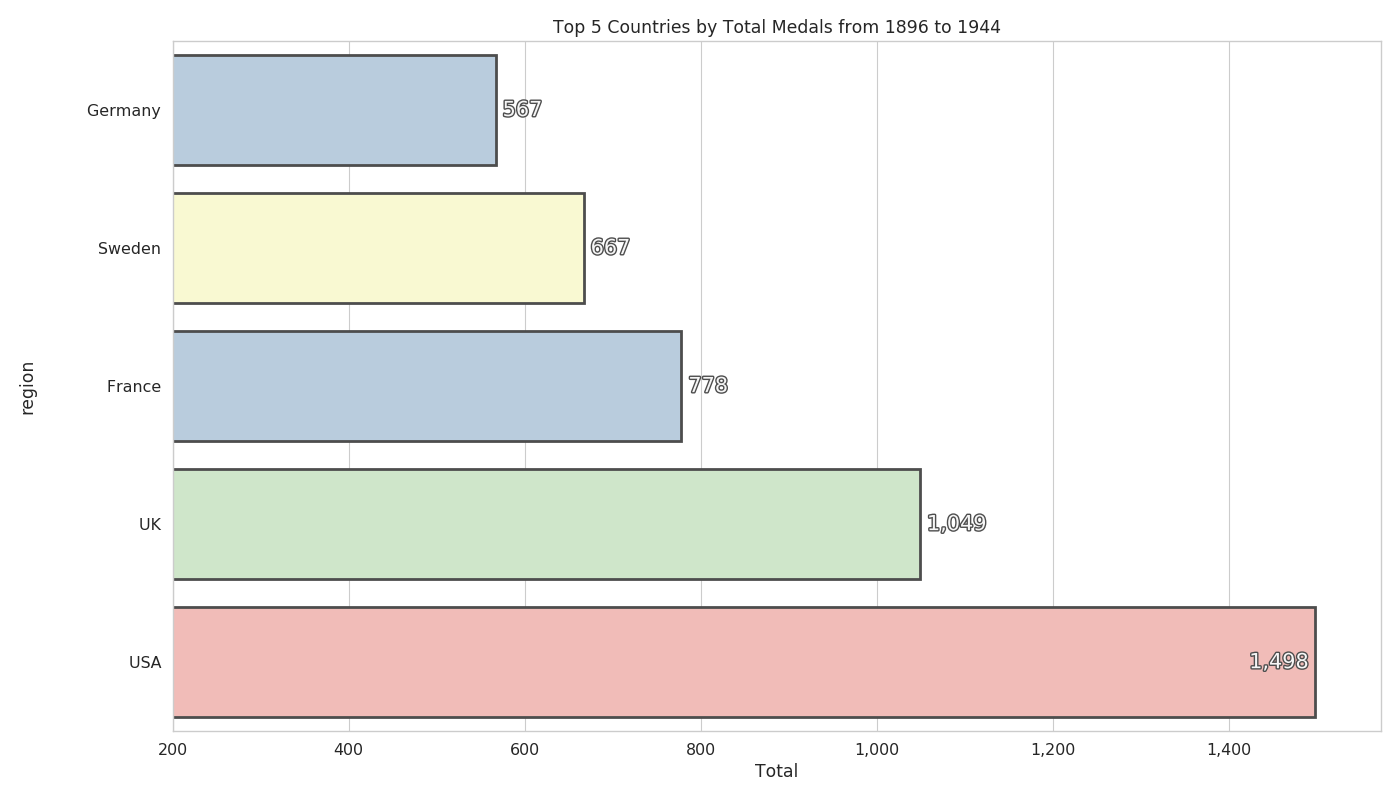

In [27]:
bw.set_chart_options(x_tick_format="{:,.0f}",
                     palette="Pastel1", 
                     title="Top 5 Countries by Total Medals from <mindatetime> to <currentdatetime>",dateformat="%Y", 
                     y_label="State", 
                     use_top_x=20, display_top_x=5,
                     border_size=2, border_colour=(0.3,0.3,0.3),
                     font_scale=1.3,
                     use_data_labels="end",
                     squeeze_lower_x="300") # <----------- HERE either enter the percentace lower than the minimum data value you want the x value to be. OR the absolute value i.e 1000. *** NOTE: Will change to the nearest MAJOR TICK MARK
bw.test_chart(12)

In [26]:
bw.set_display_settings(time_in_seconds=15, video_file_name="mean_height_by_country.mp4")
bw.write_video()

Writing Frame  434/434  Render Speed: 6.2fps  Time taken: 0:01:09  Time left: 23:59:59 [==============================] 100.23 % 
Base video created ... converting to desired output type


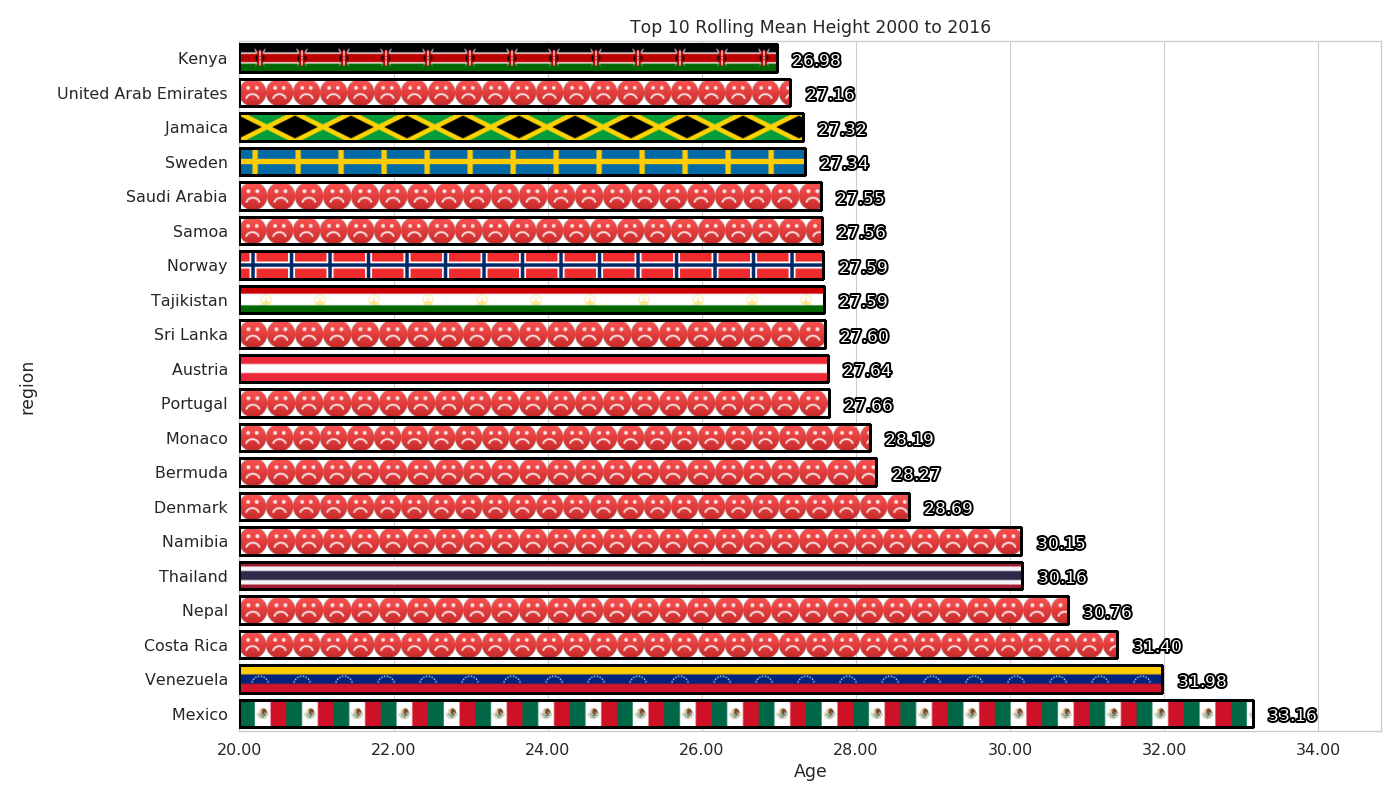

In [10]:
bw.test_chart(27)

In [14]:
outdf = bw.show_output_df()

outdf[outdf["region"] == "UK"]


Empty DataFrame
Columns: [Year, Age, region]
Index: []

In [18]:
olymp_df[olymp_df["region"] == "UK"]["Height"].count()

7942

In [19]:
olymp_df[olymp_df["region"] == "UK"]["Height"]

148666      NaN
148667      NaN
148668    175.0
148669    175.0
148670    175.0
          ...  
160917      NaN
160918      NaN
160919      NaN
160920      NaN
160921    180.0
Name: Height, Length: 12256, dtype: float64

In [21]:
olymp_df.describe()

Age         Height         Weight         Bronze  \
count  189936.000000  154466.000000  152103.000000  196282.000000   
mean       25.576489     175.134237      70.423470       0.048186   
std         6.437478      10.541381      14.372431       0.214159   
min        11.000000     127.000000      25.000000       0.000000   
25%        21.000000     168.000000      60.000000       0.000000   
50%        24.000000     175.000000      69.000000       0.000000   
75%        28.000000     182.000000      79.000000       0.000000   
max        97.000000     226.000000     214.000000       1.000000   

                Gold         Silver          Total        Numeric  
count  196282.000000  196282.000000  196282.000000  196282.000000  
mean        0.048945       0.047243       0.144374     449.635856  
std         0.215753       0.212159       0.351469     277.046175  
min         0.000000       0.000000       0.000000       4.000000  
25%         0.000000       0.000000       0.000000     233.000000  
50%         0.000000       0.000000       0.000000     392.000000  
75%         0.000000       0.000000       0.000000     724.000000  
max         1.000000       1.000000       1.000000     887.000000

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("usa_county_wise.csv")
df

UID iso2 iso3  code3  FIPS          Admin2  \
0             16   AS  ASM     16  60.0             NaN   
1            316   GU  GUM    316  66.0             NaN   
2            580   MP  MNP    580  69.0             NaN   
3            630   PR  PRI    630  72.0             NaN   
4            850   VI  VIR    850  78.0             NaN   
...          ...  ...  ...    ...   ...             ...   
375010  84070016   US  USA    840   NaN    Central Utah   
375011  84070017   US  USA    840   NaN  Southeast Utah   
375012  84070018   US  USA    840   NaN  Southwest Utah   
375013  84070019   US  USA    840   NaN       TriCounty   
375014  84070020   US  USA    840   NaN    Weber-Morgan   

                  Province_State Country_Region        Lat       Long_  \
0                 American Samoa             US -14.271000 -170.132000   
1                           Guam             US  13.444300  144.793700   
2       Northern Mariana Islands             US  15.097900  145.673900   
3                    Puerto Rico             US  18.220800  -66.590100   
4                 Virgin Islands             US  18.335800  -64.896300   
...                          ...            ...        ...         ...   
375010                      Utah             US  39.372319 -111.575868   
375011                      Utah             US  38.996171 -110.701396   
375012                      Utah             US  37.854472 -111.441876   
375013                      Utah             US  40.124915 -109.517442   
375014                      Utah             US  41.271160 -111.914512   

                        Combined_Key     Date  Confirmed  Deaths  
0                 American Samoa, US  1/22/20          0       0  
1                           Guam, US  1/22/20          0       0  
2       Northern Mariana Islands, US  1/22/20          0       0  
3                    Puerto Rico, US  1/22/20          0       0  
4                 Virgin Islands, US  1/22/20          0       0  
...                              ...      ...        ...     ...  
375010        Central Utah, Utah, US  5/15/20         29       0  
375011      Southeast Utah, Utah, US  5/15/20         13       0  
375012      Southwest Utah, Utah, US  5/15/20        200       3  
375013           TriCounty, Utah, US  5/15/20         16       0  
375014        Weber-Morgan, Utah, US  5/15/20        216       3  

[375015 rows x 14 columns]

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df

UID iso2 iso3  code3  FIPS          Admin2  \
0             16   AS  ASM     16  60.0             NaN   
1            316   GU  GUM    316  66.0             NaN   
2            580   MP  MNP    580  69.0             NaN   
3            630   PR  PRI    630  72.0             NaN   
4            850   VI  VIR    850  78.0             NaN   
...          ...  ...  ...    ...   ...             ...   
375010  84070016   US  USA    840   NaN    Central Utah   
375011  84070017   US  USA    840   NaN  Southeast Utah   
375012  84070018   US  USA    840   NaN  Southwest Utah   
375013  84070019   US  USA    840   NaN       TriCounty   
375014  84070020   US  USA    840   NaN    Weber-Morgan   

                  Province_State Country_Region        Lat       Long_  \
0                 American Samoa             US -14.271000 -170.132000   
1                           Guam             US  13.444300  144.793700   
2       Northern Mariana Islands             US  15.097900  145.673900   
3                    Puerto Rico             US  18.220800  -66.590100   
4                 Virgin Islands             US  18.335800  -64.896300   
...                          ...            ...        ...         ...   
375010                      Utah             US  39.372319 -111.575868   
375011                      Utah             US  38.996171 -110.701396   
375012                      Utah             US  37.854472 -111.441876   
375013                      Utah             US  40.124915 -109.517442   
375014                      Utah             US  41.271160 -111.914512   

                        Combined_Key       Date  Confirmed  Deaths  
0                 American Samoa, US 2020-01-22          0       0  
1                           Guam, US 2020-01-22          0       0  
2       Northern Mariana Islands, US 2020-01-22          0       0  
3                    Puerto Rico, US 2020-01-22          0       0  
4                 Virgin Islands, US 2020-01-22          0       0  
...                              ...        ...        ...     ...  
375010        Central Utah, Utah, US 2020-05-15         29       0  
375011      Southeast Utah, Utah, US 2020-05-15         13       0  
375012      Southwest Utah, Utah, US 2020-05-15        200       3  
375013           TriCounty, Utah, US 2020-05-15         16       0  
375014        Weber-Morgan, Utah, US 2020-05-15        216       3  

[375015 rows x 14 columns]

In [4]:
df = df[df["Province_State"].isin(["New York","New Jersey"]) == False]

In [5]:
df = pd.read_csv("usa_county_wise.csv")
df["Date"] = pd.to_datetime(df["Date"])
from progplot import BarWriter

bw = BarWriter()

bw.set_data(df, "Province_State", "Date", "Deaths", resample="1w", groupby_agg="sum", resample_agg="mean",output_agg=None)

bw.set_display_settings(time_in_seconds=10, video_file_name = "deathsbystate.mp4")

bw.set_chart_options(x_tick_format="{:,.0f}", dateformat="%Y-%m",
                     palette="copper",
                     title="Top 15 Weekly Deaths <currentdatetime>", y_label="State",
                     use_top_x=30, display_top_x=15,
                     border_size=2, border_colour=(0.12,0.12,0.12),
                     font_scale=1.6, title_font_size=18,x_label_font_size=16,
                     use_data_labels="end")

bw.test_chart(50)

Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


ValueError: Frame number not available - must be between 0 and 16

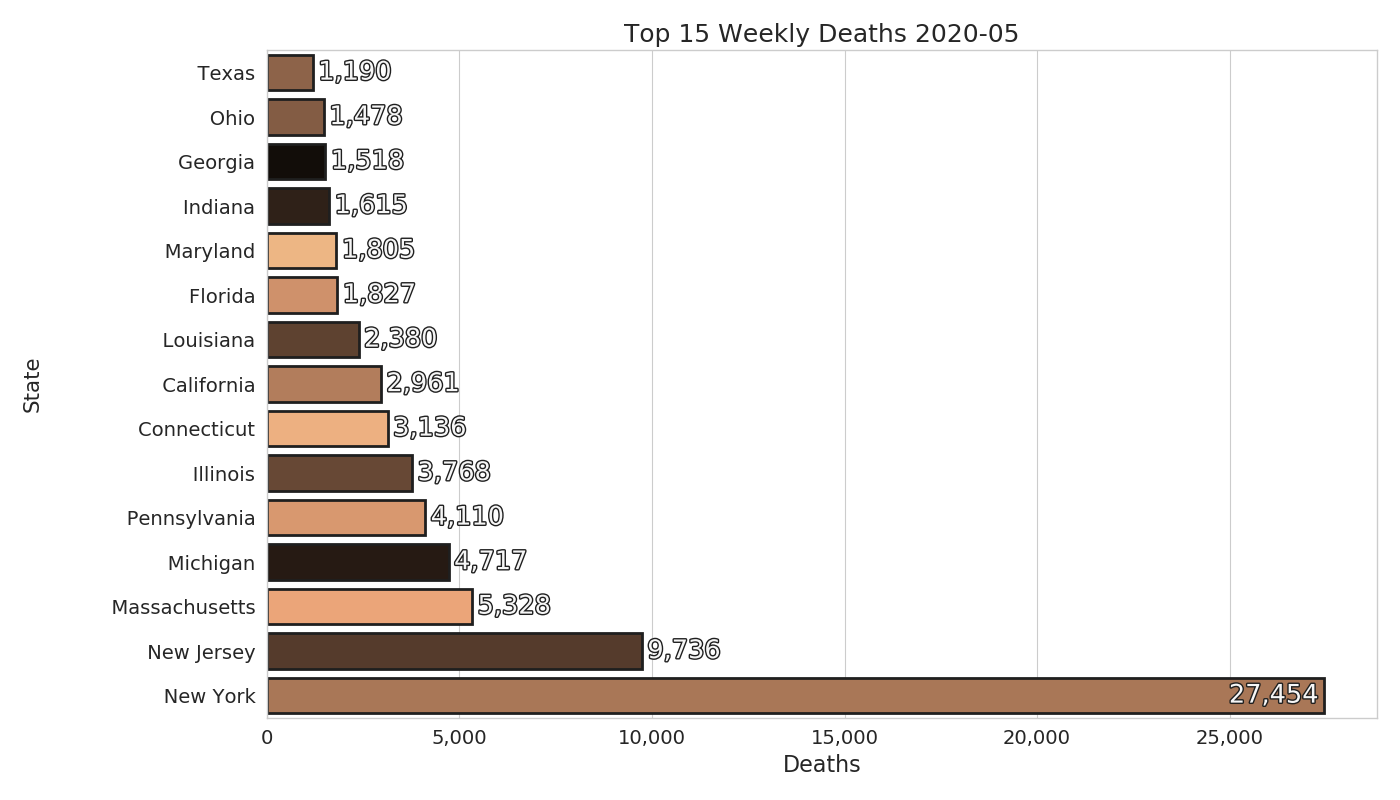

In [7]:
bw.test_chart(16)

In [ ]:
bw.set_chart_options(x_tick_format="{:,.0f}", dateformat="%Y-%m",
                     palette="copper",
                     title="Top 15 Weekly Deaths <currentdatetime>", y_label="State",
                     use_top_x=30, display_top_x=15,
                     border_size=2, border_colour=(0.12,0.12,0.12),
                     font_scale=1.6, title_font_size=18,x_label_font_size=16,
                     use_data_labels="end",
                     sort=False)

bw.test_chart(50)

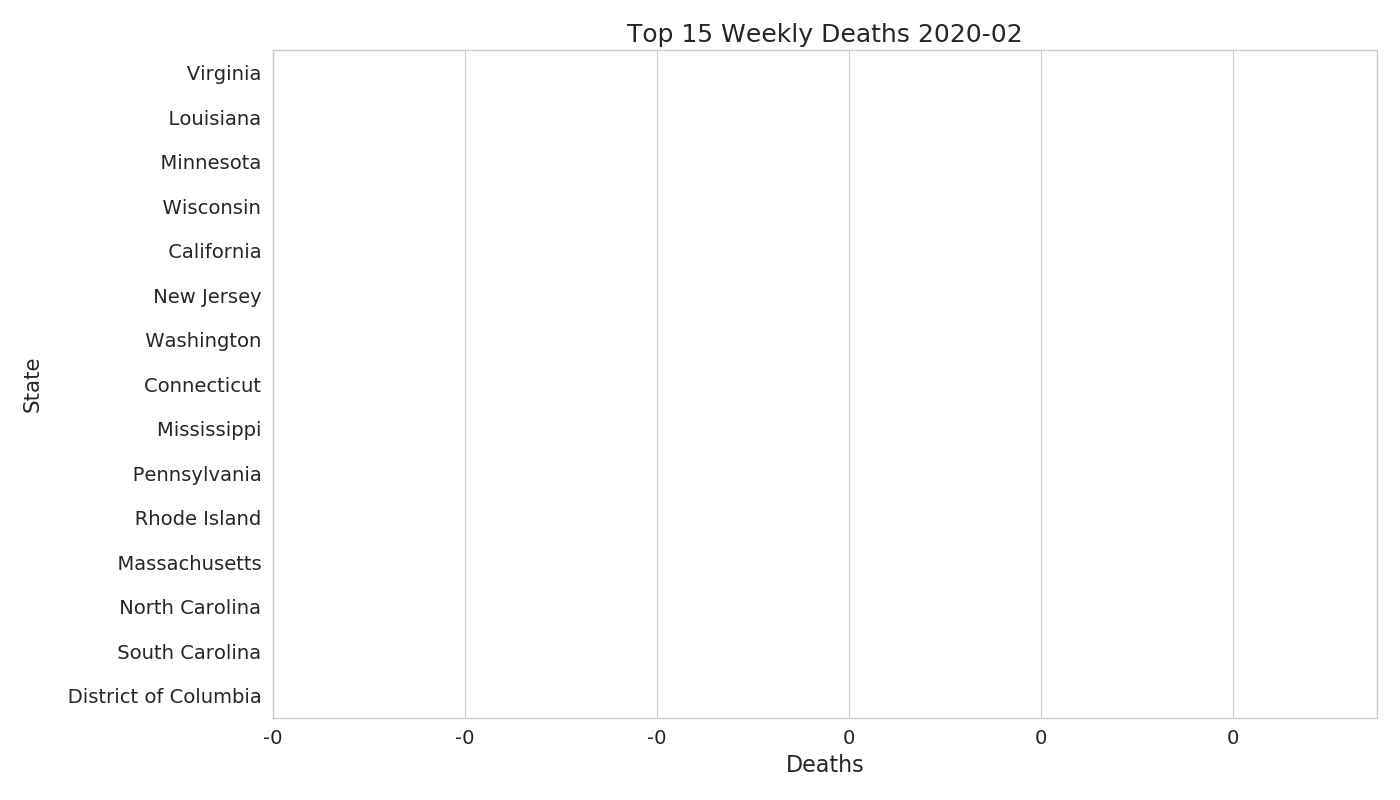

In [15]:
bw.set_display_settings(time_in_seconds=20, video_file_name = "deathsbystate.mp4")
bw.test_chart()

In [16]:
bw.write_video()

Writing Frame  595/595  Render Speed: 5.0fps  Time taken: 0:02:00  Time left: 23:59:59 [==============================] 100.17 % 
Base video created ... converting to desired output type


In [5]:
from progplot import BarWriter, palettes

In [6]:
bw = BarWriter()

In [7]:
bw.set_data(df, "Province_State", "Date", "Deaths", resample="1d", groupby_agg="sum", resample_agg="mean",output_agg=None)

Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


/home/lewis/PycharmProjects/ProgPlot/progplot/plotter.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda x: pd.to_datetime(str(x)) if (type(x) == str or type(x) == int) else x)


In [8]:
help(bw.set_chart_options)

Help on method set_chart_options in module progplot.plotter:

set_chart_options(use_top_x=None, display_top_x=None, x_tick_format=None, y_tick_format=None, dateformat=None, y_label=True, y_label_font_size=None, x_label=True, x_label_font_size=None, title=None, title_font_size=None, use_data_labels=None, figsize=(14, 8), dpi=100, border_size=None, border_colour=(0, 0, 0), palette='magma', palette_keep=True, palette_random=True, tight_layout=True, sort=True, seaborn_style='whitegrid', seaborn_context='paper', font_scale=1.1, convert_bar_to_image=False, image_dict=None) method of progplot.plotter.BarWriter instance
    Used to set chart options - to be called before video creation to test the output of the chart.
    Two important values are use_top_x and display_top_x:
    use_top_x trims the dataframe down to the top x values.
    display_top_x shows only x categories on the chart.
    You could then therefor keep 20 categories, only showing 10. The effect? The lowest values contend for

In [9]:
bw.set_display_settings(time_in_seconds=10, video_file_name = "TESTdeathsbystate.mp4")


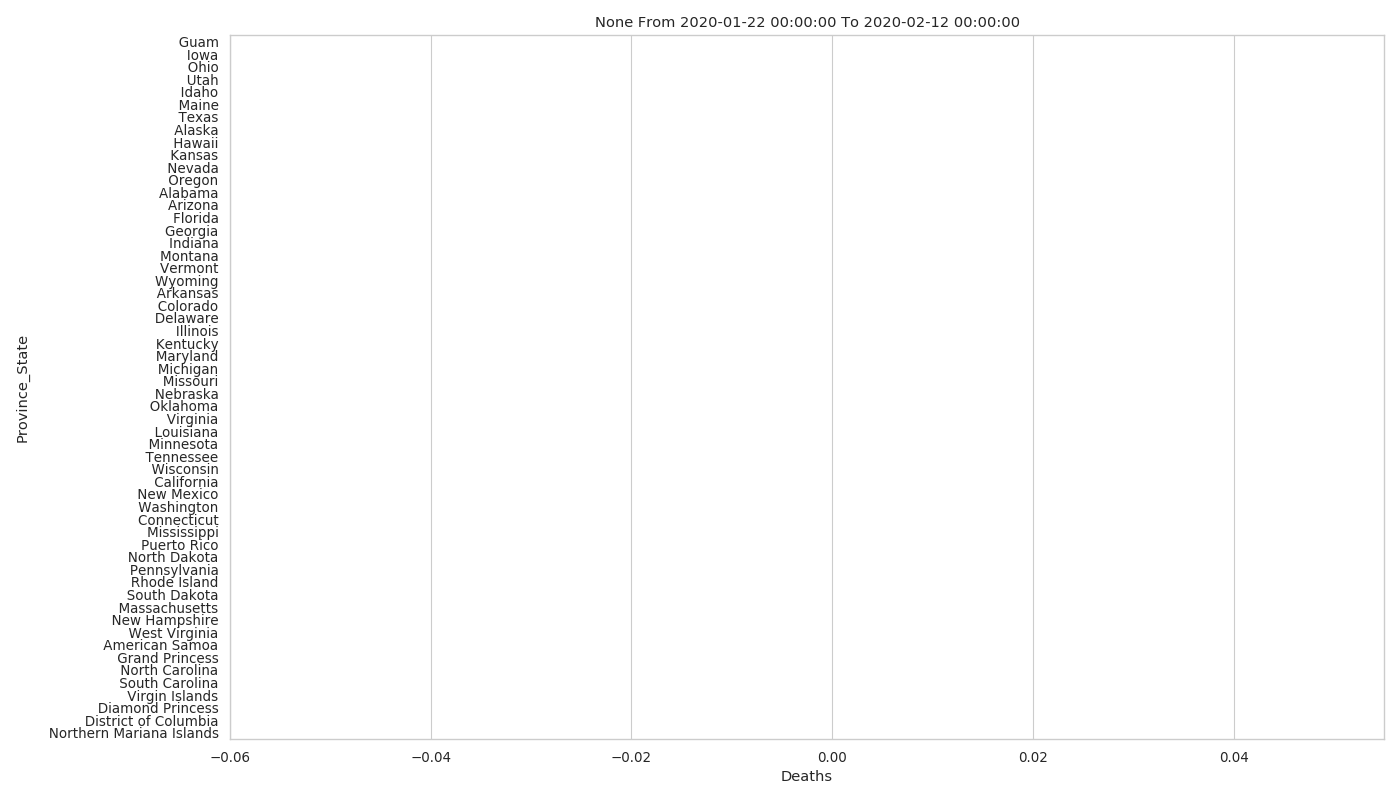

In [10]:
bw.set_chart_options()
bw.test_chart()


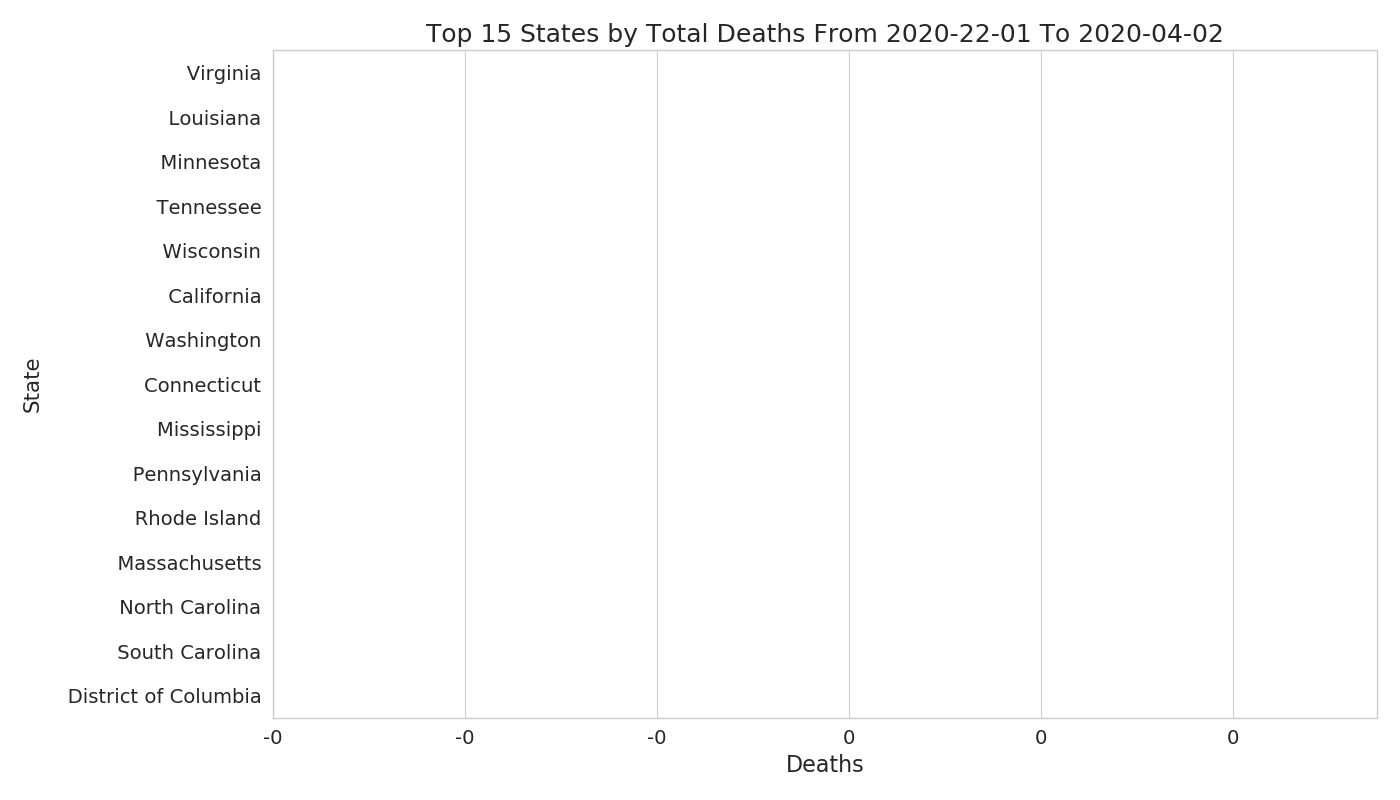

In [11]:
bw.set_chart_options(x_tick_format="{:,.0f}", dateformat="%Y-%d-%m", 
                     palette="copper", 
                     title="Top 15 States by Total Deaths", y_label="State", 
                     use_top_x=30, display_top_x=15,
                     border_size=2, border_colour=(0.12,0.12,0.12),
                     font_scale=1.6, title_font_size=18,x_label_font_size=16,
                     use_data_labels="end")
bw.test_chart()


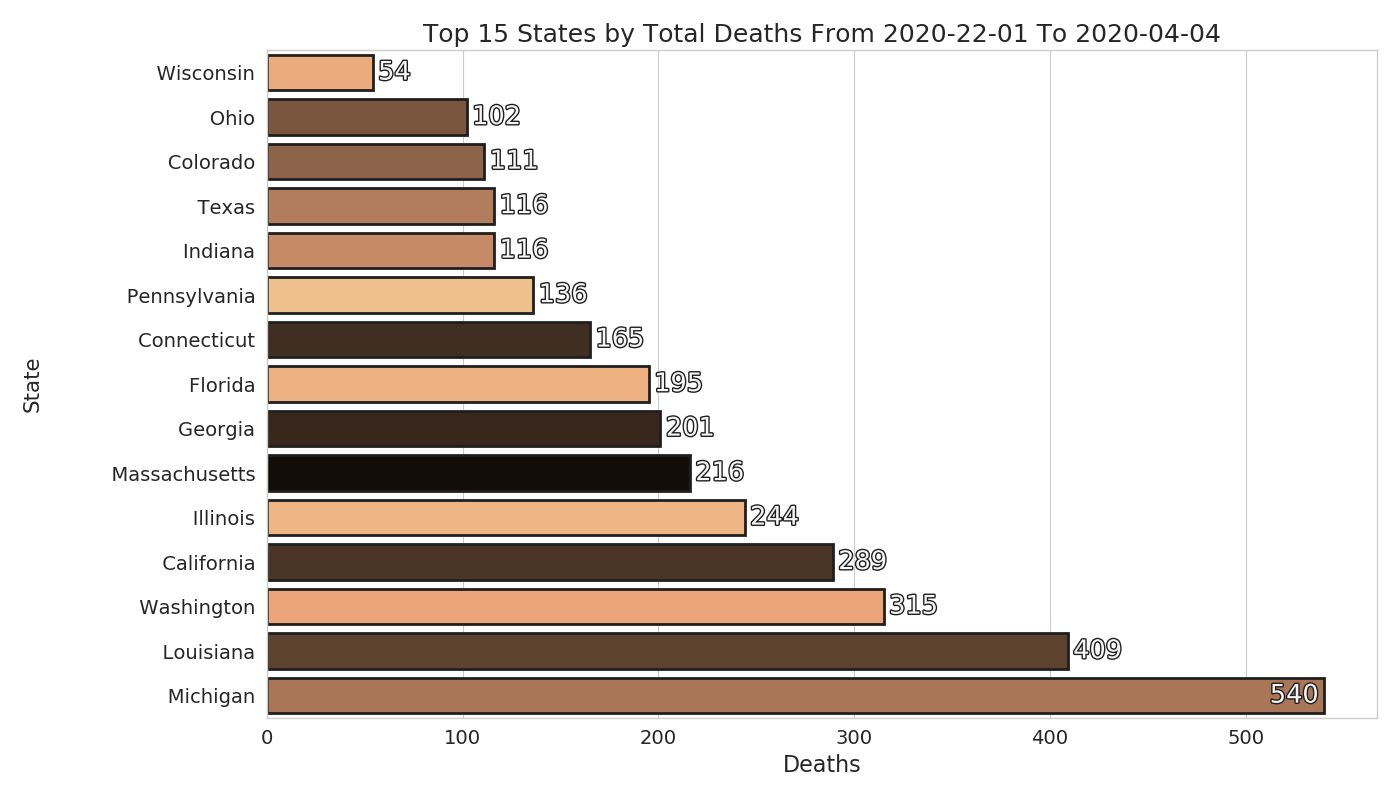

In [12]:
bw.test_chart()


In [13]:
bw.write_video()

Writing Frame  230/230  Render Speed: 4.5fps  Time taken: 0:00:51  Time left: 23:59:59 [==============================] 100.44 % 
Base video created ... converting to desired output type


In [14]:
bw.create_gif()

Converting video file to gif.
Video file converted to gif.


In [15]:
bw.show_gif()

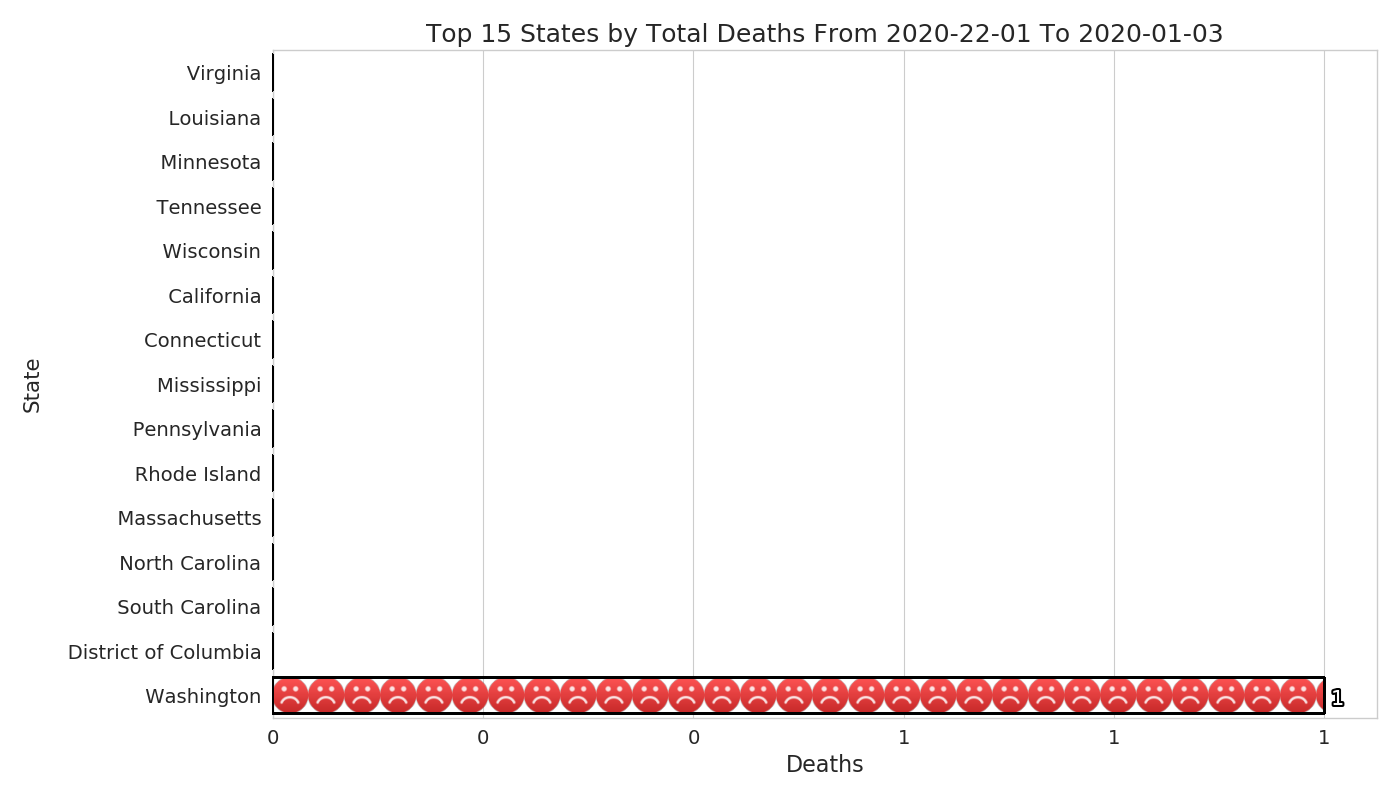

In [16]:
bw.set_chart_options(x_tick_format="{:,.0f}", dateformat="%Y-%d-%m", 
                     palette="copper", 
                     title="Top 15 States by Total Deaths", y_label="State", 
                     use_top_x=30, display_top_x=15,
                     border_size=2, border_colour=(0.12,0.12,0.12),
                     font_scale=1.6, title_font_size=18,x_label_font_size=16,
                     use_data_labels="end",convert_bar_to_image=True,image_dict={"New York":"./icons/test3.png","New Jersey":"./icons/test6.png","Ohio":"./icons/test0.png"})
bw.test_chart()

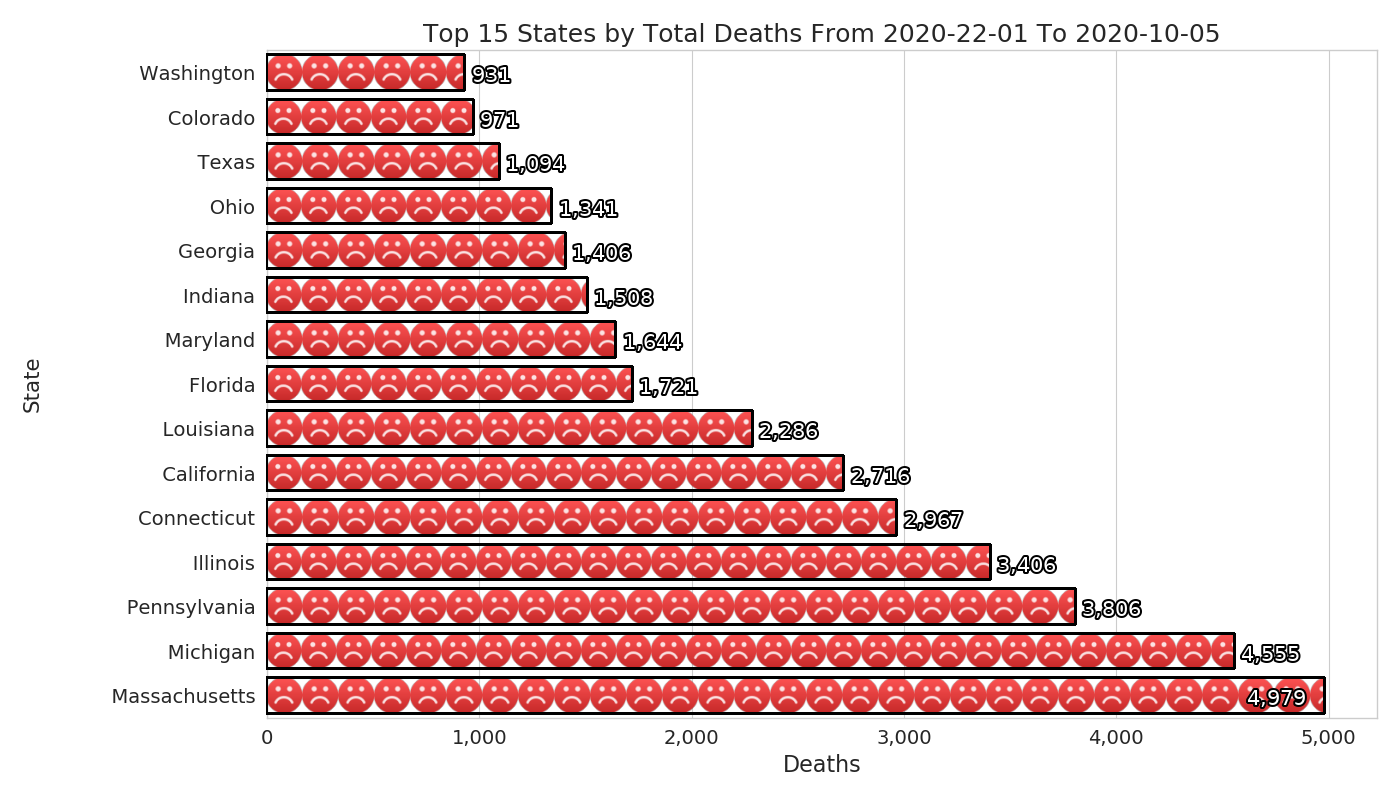

In [23]:
bw.test_chart()

In [24]:
df1 = pd.read_csv("covid_19_clean_complete.csv")
df1

Province/State         Country/Region        Lat       Long     Date  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
30470            NaN  Sao Tome and Principe   0.186360   6.613081  5/15/20   
30471            NaN                  Yemen  15.552727  48.516388  5/15/20   
30472            NaN                Comoros -11.645500  43.333300  5/15/20   
30473            NaN             Tajikistan  38.861034  71.276093  5/15/20   
30474            NaN                Lesotho -29.609988  28.233608  5/15/20   

       Confirmed  Deaths  Recovered  
0              0       0          0  
1              0       0          0  
2              0       0          0  
3              0       0          0  
4              0       0          0  
...          ...     ...        ...  
30470        235       7          4  
30471        106      15          1  
30472         11       1          3  
30473       1118      33          0  
30474          1       0          0  

[30475 rows x 8 columns]

In [25]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.000000  65.000000 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
30470            NaN  Sao Tome and Principe   0.186360   6.613081 2020-05-15   
30471            NaN                  Yemen  15.552727  48.516388 2020-05-15   
30472            NaN                Comoros -11.645500  43.333300 2020-05-15   
30473            NaN             Tajikistan  38.861034  71.276093 2020-05-15   
30474            NaN                Lesotho -29.609988  28.233608 2020-05-15   

       Confirmed  Deaths  Recovered  
0              0       0          0  
1              0       0          0  
2              0       0          0  
3              0       0          0  
4              0       0          0  
...          ...     ...        ...  
30470        235       7          4  
30471        106      15          1  
30472         11       1          3  
30473       1118      33          0  
30474          1       0          0  

[30475 rows x 8 columns]

In [26]:
codes = pd.read_html("https://www.iban.com/country-codes",attrs = {'id': 'myTable'})
codes[0]

Country Alpha-2 code Alpha-3 code  Numeric
0          Afghanistan           AF          AFG        4
1        Åland Islands           AX          ALA      248
2              Albania           AL          ALB        8
3              Algeria           DZ          DZA       12
4       American Samoa           AS          ASM       16
..                 ...          ...          ...      ...
244  Wallis and Futuna           WF          WLF      876
245     Western Sahara           EH          ESH      732
246              Yemen           YE          YEM      887
247             Zambia           ZM          ZMB      894
248           Zimbabwe           ZW          ZWE      716

[249 rows x 4 columns]

In [27]:
df1 = df1.merge(codes[0],left_on="Country/Region", right_on="Country")
df1 = df1[["Country/Region","Date","Confirmed","Deaths","Alpha-2 code"]]
df1

Country/Region       Date  Confirmed  Deaths Alpha-2 code
0        Afghanistan 2020-01-22          0       0           AF
1        Afghanistan 2020-01-23          0       0           AF
2        Afghanistan 2020-01-24          0       0           AF
3        Afghanistan 2020-01-25          0       0           AF
4        Afghanistan 2020-01-26          0       0           AF
...              ...        ...        ...     ...          ...
25065        Lesotho 2020-05-11          0       0           LS
25066        Lesotho 2020-05-12          0       0           LS
25067        Lesotho 2020-05-13          1       0           LS
25068        Lesotho 2020-05-14          1       0           LS
25069        Lesotho 2020-05-15          1       0           LS

[25070 rows x 5 columns]

In [28]:
countries = list(df1.loc[:,"Country/Region"].unique())
codes = list(df1.loc[:,"Alpha-2 code"].unique())
                                  

In [29]:
image_dict = {country:f"./icons/flags/{str(code).lower()}.png" for country,code in zip(countries,codes)}
image_dict

{'Afghanistan': './icons/flags/af.png',
 'Albania': './icons/flags/al.png',
 'Algeria': './icons/flags/dz.png',
 'Andorra': './icons/flags/ad.png',
 'Angola': './icons/flags/ao.png',
 'Antigua and Barbuda': './icons/flags/ag.png',
 'Argentina': './icons/flags/ar.png',
 'Armenia': './icons/flags/am.png',
 'Australia': './icons/flags/au.png',
 'Austria': './icons/flags/at.png',
 'Azerbaijan': './icons/flags/az.png',
 'Bahrain': './icons/flags/bh.png',
 'Bangladesh': './icons/flags/bd.png',
 'Barbados': './icons/flags/bb.png',
 'Belarus': './icons/flags/by.png',
 'Belgium': './icons/flags/be.png',
 'Benin': './icons/flags/bj.png',
 'Bhutan': './icons/flags/bt.png',
 'Bosnia and Herzegovina': './icons/flags/ba.png',
 'Brazil': './icons/flags/br.png',
 'Bulgaria': './icons/flags/bg.png',
 'Burkina Faso': './icons/flags/bf.png',
 'Cabo Verde': './icons/flags/cv.png',
 'Cambodia': './icons/flags/kh.png',
 'Cameroon': './icons/flags/cm.png',
 'Canada': './icons/flags/ca.png',
 'Chad': './icons

In [30]:
!wget "https://flagpedia.net/data/flags/w320.zip"

--2020-05-22 10:37:57--  https://flagpedia.net/data/flags/w320.zip
Resolving flagpedia.net (flagpedia.net)... 104.26.5.62, 104.26.4.62, 2606:4700:20::681a:43e, ...
Connecting to flagpedia.net (flagpedia.net)|104.26.5.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992314 (969K) [application/zip]
Saving to: ‘w320.zip.4’

w320.zip.4          100%[===================>] 969.06K  3.20MB/s    in 0.3s    

2020-05-22 10:37:57 (3.20 MB/s) - ‘w320.zip.4’ saved [992314/992314]



In [18]:
import cv2

In [52]:
cv2.imread("https://raw.githubusercontent.com/lewis-morris/progplot/master/progplot/error.png")

In [31]:
import zipfile
with zipfile.ZipFile("w320.zip", 'r') as zip_ref:
    zip_ref.extractall("./icons/flags/")

In [34]:
bw = BarWriter()
bw.set_data(df1, "Country/Region", "Date", "Deaths", resample="1d", groupby_agg="sum", resample_agg="sum",output_agg=None)

bw.set_display_settings(time_in_seconds=45, video_file_name = "deathsbycountrywithflag.mp4")

bw.set_chart_options(x_tick_format="{:,.0f}", dateformat="%Y-%d-%m", 
                     palette="copper", 
                     title="Top 15 Countries by Total Covid-19 Deaths", y_label="Country", 
                     use_top_x=30, display_top_x=15,
                     border_size=1, border_colour=(0.12,0.12,0.12),
                     font_scale=1.6, title_font_size=18,x_label_font_size=16,
                     use_data_labels="end",convert_bar_to_image=True,image_dict=image_dict)

Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


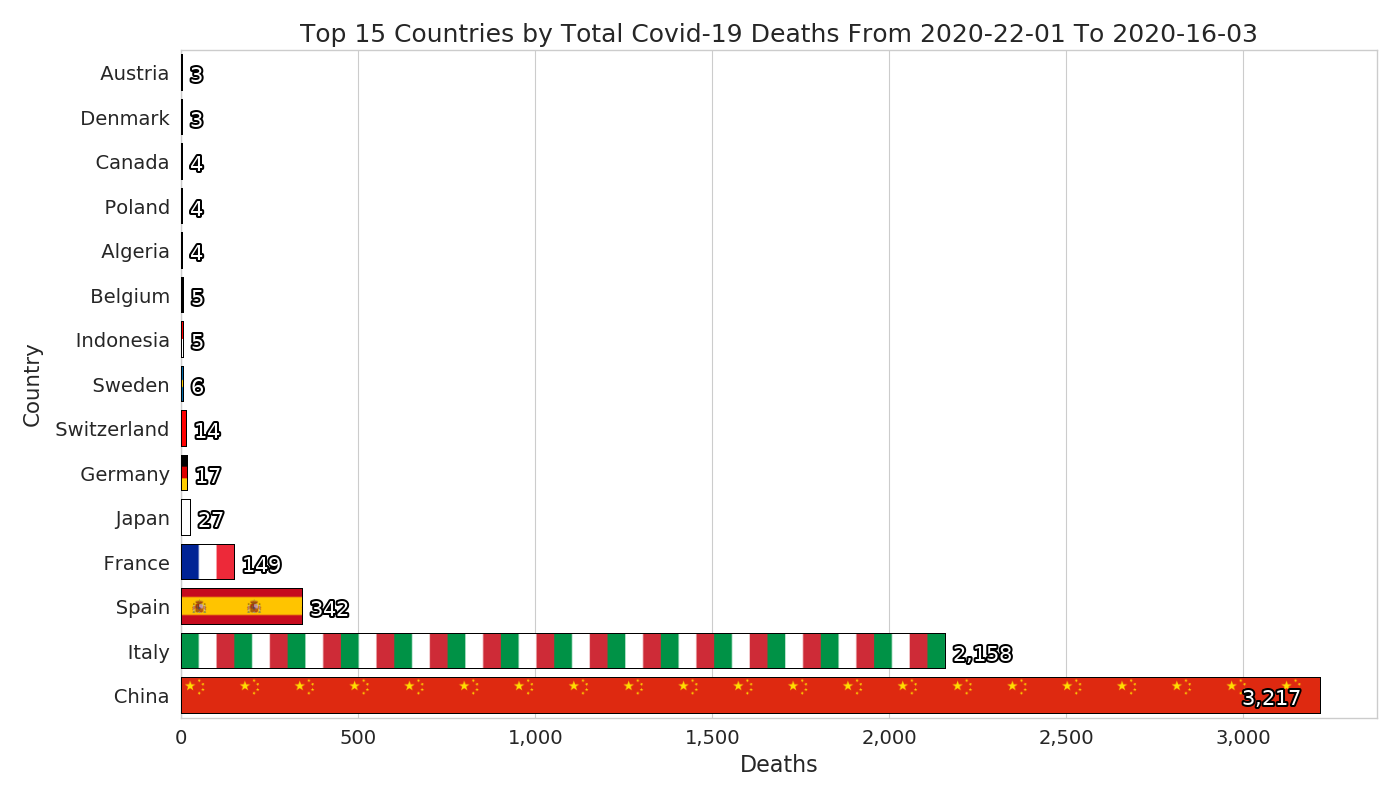

In [43]:
bw.test_chart()

In [45]:
from IPython.display import HTML

In [52]:
HTML(f"""<video controls>
  <source src="deathsbycountrywithflag.mp4" type="video/mp4">
  </video>
""")

In [44]:
bw.write_video()

Writing Frame 1265/1265  Render Speed: 2.7fps  Time taken: 0:07:54  Time left: 23:59:59 [==============================] 100.08 % 
Base video created ... converting to desired output type


In [29]:
bw.create_gif()

Converting video file to gif.
Video file converted to gif.


In [30]:
bw.show_gif()

In [39]:
import numpy as np

In [60]:
mean_df = df1.dropna()
mean_df.head(2)

Country/Region       Date  Confirmed  Deaths Alpha-2 code
0    Afghanistan 2020-01-22          0       0           AF
1    Afghanistan 2020-01-23          0       0           AF

In [61]:
mean_df = mean_df.groupby(["Country/Region","Date"]).sum().reset_index()
mean_df

Country/Region       Date  Confirmed  Deaths
0        Afghanistan 2020-01-22          0       0
1        Afghanistan 2020-01-23          0       0
2        Afghanistan 2020-01-24          0       0
3        Afghanistan 2020-01-25          0       0
4        Afghanistan 2020-01-26          0       0
...              ...        ...        ...     ...
17590       Zimbabwe 2020-05-11         36       4
17591       Zimbabwe 2020-05-12         36       4
17592       Zimbabwe 2020-05-13         37       4
17593       Zimbabwe 2020-05-14         37       4
17594       Zimbabwe 2020-05-15         42       4

[17595 rows x 4 columns]

In [62]:
df_new = None
df_list = []

for i, (x,y) in enumerate(mean_df.groupby(["Country/Region"])):
    y.reset_index(drop=True, inplace=True)
    
    print(f"\r{i}/{len(mean_df['Country/Region'].drop_duplicates())}",end="")

    for itm in np.arange(len(y)-1,0,-1):
        y.loc[itm,"Deaths"] -= y.loc[itm-1,"Deaths"]
        y.loc[itm,"Confirmed"] -= y.loc[itm-1,"Confirmed"]
    df_list.append(y)
    
df_new = pd.concat(df_list)

2/153

/home/lewis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


152/153

In [63]:
df_new.tail(30)

Country/Region       Date  Confirmed  Deaths
85        Zimbabwe 2020-04-16          0       0
86        Zimbabwe 2020-04-17          1       0
87        Zimbabwe 2020-04-18          1       0
88        Zimbabwe 2020-04-19          0       0
89        Zimbabwe 2020-04-20          0       0
90        Zimbabwe 2020-04-21          3       0
91        Zimbabwe 2020-04-22          0       1
92        Zimbabwe 2020-04-23          0       0
93        Zimbabwe 2020-04-24          1       0
94        Zimbabwe 2020-04-25          2       0
95        Zimbabwe 2020-04-26          0       0
96        Zimbabwe 2020-04-27          1       0
97        Zimbabwe 2020-04-28          0       0
98        Zimbabwe 2020-04-29          0       0
99        Zimbabwe 2020-04-30          8       0
100       Zimbabwe 2020-05-01          0       0
101       Zimbabwe 2020-05-02         -6       0
102       Zimbabwe 2020-05-03          0       0
103       Zimbabwe 2020-05-04          0       0
104       Zimbabwe 2020-05-05          0       0
105       Zimbabwe 2020-05-06          0       0
106       Zimbabwe 2020-05-07          0       0
107       Zimbabwe 2020-05-08          0       0
108       Zimbabwe 2020-05-09          1       0
109       Zimbabwe 2020-05-10          1       0
110       Zimbabwe 2020-05-11          0       0
111       Zimbabwe 2020-05-12          0       0
112       Zimbabwe 2020-05-13          1       0
113       Zimbabwe 2020-05-14          0       0
114       Zimbabwe 2020-05-15          5       0

In [65]:
confirmed_df

Date  Deaths
0   2020-01-22      17
1   2020-01-23       1
2   2020-01-24       8
3   2020-01-25      16
4   2020-01-26      14
..         ...     ...
110 2020-05-11    2066
111 2020-05-12    3039
112 2020-05-13    2726
113 2020-05-14    2764
114 2020-05-15    2971

[115 rows x 2 columns]

In [66]:
dead_df = df_new[["Country/Region","Date","Confirmed"]].groupby(["Date"]).sum().reset_index()
dead_df["Status"] = "Deaths"

confirmed_df = df_new[["Country/Region","Date","Deaths"]].groupby(["Date"]).sum().reset_index()
confirmed_df["Status"] = "Confirmed"
confirmed_df.columns = dead_df.columns

new_df = pd.concat([dead_df,confirmed_df])
new_df.sample(10)

Date  Confirmed     Status
4  2020-01-26         14  Confirmed
39 2020-03-01         43  Confirmed
1  2020-01-23         97     Deaths
17 2020-02-08       2723     Deaths
7  2020-01-29        584     Deaths
64 2020-03-26      37629     Deaths
23 2020-02-14       6474     Deaths
42 2020-03-04       1179     Deaths
98 2020-04-29       3055  Confirmed
73 2020-04-04      38294     Deaths

In [111]:
bw = BarWriter()
bw.set_data(new_df, "Status", "Date", "Confirmed", resample="1w", groupby_agg="mean", resample_agg="mean",output_agg=None)

bw.set_display_settings(time_in_seconds=45, video_file_name = "DailyDeaths.mp4", codec="MP4V")

bw.set_chart_options(x_tick_format="{:,.0f}", dateformat="%Y-%d-%m", 
                     palette="copper", 
                     title="Daily Deaths VS Cases ", y_label="", 
                     use_top_x=30, display_top_x=15,
                     border_size=1, border_colour=(0.12,0.12,0.12),
                     font_scale=1.8, title_font_size=18,x_label_font_size=16,
                     use_data_labels="end")

Creating resampled video dataframe (aggregating/ resampling). This may take a moment.


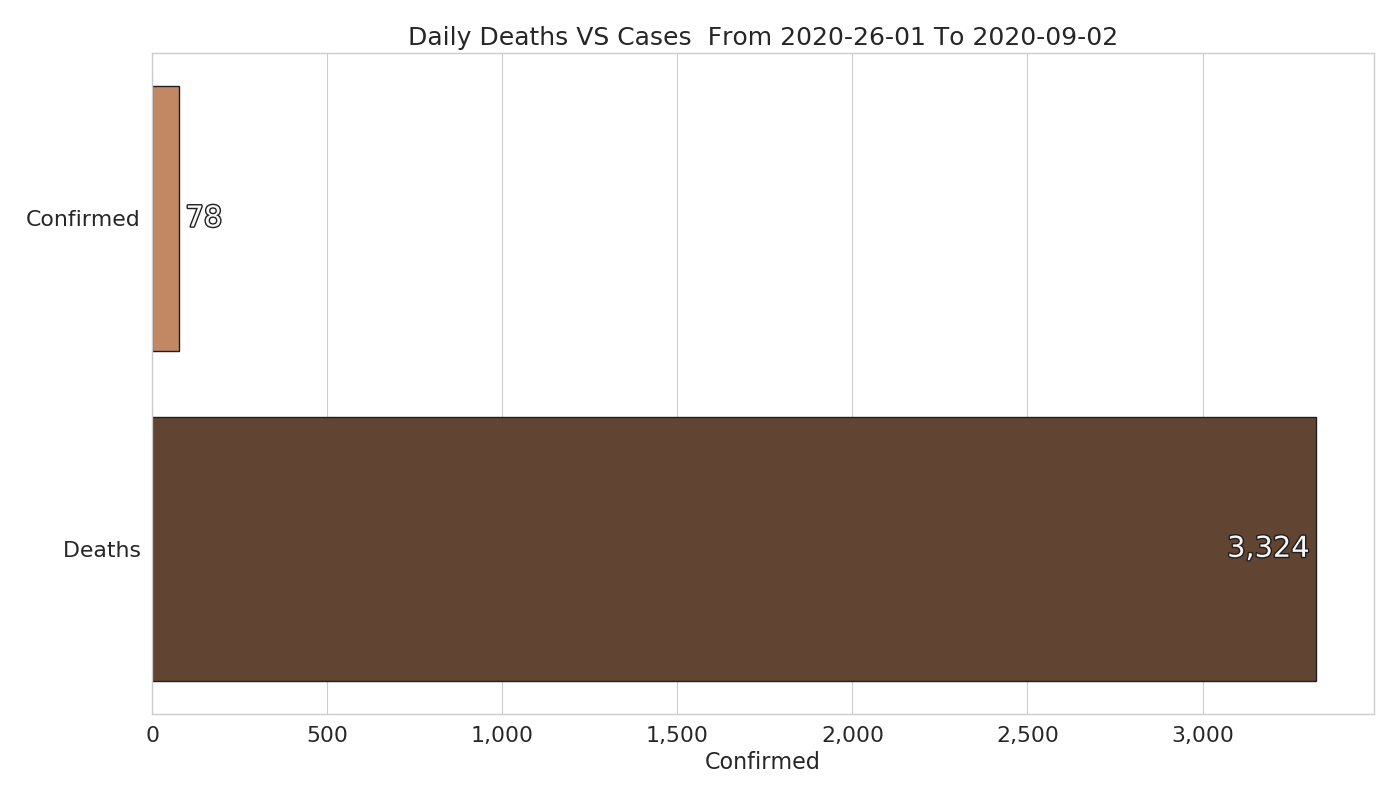

In [112]:
bw.test_chart()

In [ ]:
bw.write_video()

Writing Frame  161/1343  Render Speed: 6.9fps  Time taken: 0:00:23  Time left: 0:02:52 [====--------------------------] 12.0 %  

In [82]:
bw.show_video()

In [84]:
bw.create_gif()

Converting video file to gif.
Error Generating GIF. Have you got ffmpeg installed?


In [3]:
plt.ion()

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = [f"lewis {i}" for i in range(10)]
data1 = np.random.randint(32445,37445,10)

In [27]:
ax.set_xlim((500,35000),auto=False)

(500, 35000)

In [ ]:
plt.tight_layout()

In [12]:
ax.xaxis.set_

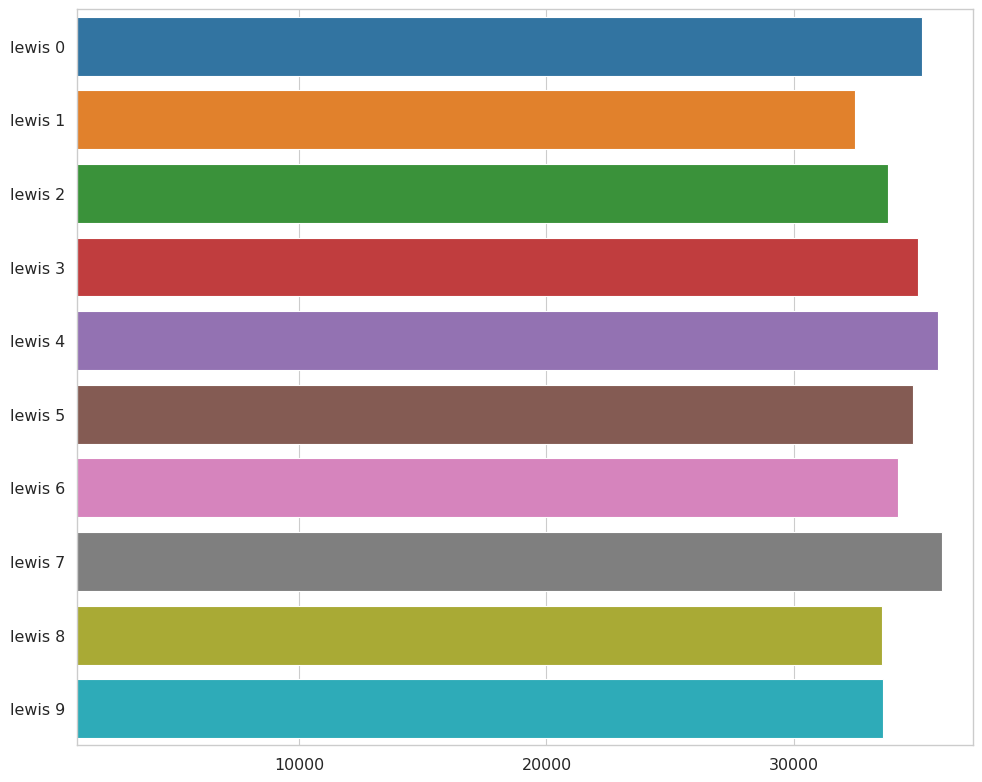

In [31]:
plt.ion()
fig = plt.figure(figsize=(10,8),dpi=100)
ax = sns.barplot(data1,data)
ax.set_xlim((1000,37236),auto=False)
#ax.set_xmargin(-0.5)
#ax.autoscale()
#ax.set_xbound(500,ax.get_xlim()[1])
plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(6,min_n_ticks=6,symmetric=True))


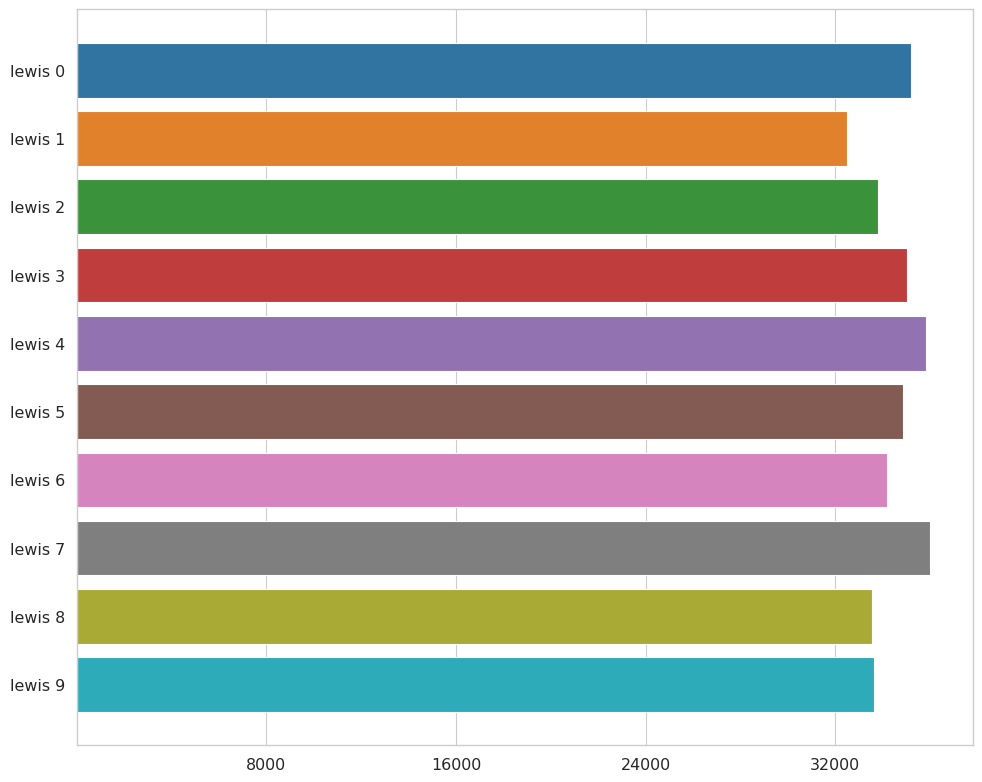

In [32]:
plt.ion()
fig = plt.figure(figsize=(10,8),dpi=100)
ax = sns.barplot(data1,data)
ax.set_xlim((15500,37236),auto=False)
#ax.set_xmargin(-0.5)
#ax.autoscale()
#ax.set_xbound(500,ax.get_xlim()[1])
plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(6,symmetric=False,prune="both"))
ax.autoscale()

In [ ]:
ax.autoscale()

In [55]:
def autoscale(ax=None, axis='y', margin=0.1):
    '''Autoscales the x or y axis of a given matplotlib ax object
    to fit the margins set by manually limits of the other axis,
    with margins in fraction of the width of the plot

    Defaults to current axes object if not specified.
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    if ax is None:
        ax = plt.gca()
    newlow, newhigh = np.inf, -np.inf

    for artist in ax.collections + ax.lines:
        x,y = get_xy(artist)
        if axis == 'y':
            setlim = ax.set_ylim
            lim = ax.get_xlim()
            fixed, dependent = x, y
        else:
            setlim = ax.set_xlim
            lim = ax.get_ylim()
            fixed, dependent = y, x

        low, high = calculate_new_limit(fixed, dependent, lim)
        newlow = low if low < newlow else newlow
        newhigh = high if high > newhigh else newhigh

    margin = margin*(newhigh - newlow)

    print(margin)
    print(newlow)
    print(newhigh)
    setlim(newlow-margin, newhigh+margin)

def calculate_new_limit(fixed, dependent, limit):
    '''Calculates the min/max of the dependent axis given 
    a fixed axis with limits
    '''
    if len(fixed) > 2:
        mask = (fixed>limit[0]) & (fixed < limit[1])
        window = dependent[mask]
        low, high = window.min(), window.max()
    else:
        low = dependent[0]
        high = dependent[-1]
        if low == 0.0 and high == 1.0:
            # This is a axhline in the autoscale direction
            low = np.inf
            high = -np.inf
    return low, high

def get_xy(artist):
    '''Gets the xy coordinates of a given artist
    '''
    if "Collection" in str(artist):
        x, y = artist.get_offsets().T
    elif "Line" in str(artist):
        x, y = artist.get_xdata(), artist.get_ydata()
    else:
        raise ValueError("This type of object isn't implemented yet")
    return x, y